In [1]:
pants = ("Those are awesome!!!")


In [2]:
print(pants)

Those are awesome!!!


In [3]:
# This is to run tomorrow

In [4]:
!pip install python-dotenv
!pip install yfinance
!pip install tiingo
!pip install numpy
!pip install tensorflow==1.2
!pip install hvplot

import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import pprint

import time
import datetime
import pandas as pd
import requests
import yfinance as yf
import numpy as np
from sklearn import preprocessing
import requests
import hvplot.pandas

from numpy.random import seed
from tensorflow import random





ERROR: Could not find a version that satisfies the requirement tensorflow==1.2 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.8.0rc0, 2.8.0rc1, 2.8.0)
ERROR: No matching distribution found for tensorflow==1.2


In [5]:
TIINGO_API_KEY = os.getenv("1b545063658e8ac3669f26afd4f3439ff66adb3f")
load_dotenv()

headers = {
        'Content-Type': 'application/json'
        }
requestResponse = requests.get("https://api.tiingo.com/api/test?token=1b545063658e8ac3669f26afd4f3439ff66adb3f",
                                    headers=headers)
print(requestResponse.json())



{'message': 'You successfully sent a request'}


In [6]:
from tiingo import TiingoClient


config = {
    'api_key': '1b545063658e8ac3669f26afd4f3439ff66adb3f',
    'session': True # Reuse HTTP sessions across API calls for better performance
}

# Throughout the rest of this notebook, you'll use the "client" to interact with the Tiingo backend services.
client = TiingoClient(config)

# You can obtain cryptocurrency metadata using the following method.
# NOTE: Crypto symbol MUST be encapsulated in brackets as a Python list!

meta_data = client.get_crypto_metadata(['BTCUSD'], fmt='json')

#You can obtain top-of-book cryptocurrency quotes from the ``get_crypto_top_of_book()`` method.
# NOTE: Crypto symbol MUST be encapsulated in brackets as a Python list!

book_data = crypto_price = client.get_crypto_top_of_book(['BTCUSD'])

# You can obtain historical Cryptocurrency price quotes from the get_crypto_price_history() method.
# NOTE: Crypto symbol MUST be encapsulated in brackets as a Python list!

history_data_BTC = client.get_crypto_price_history(tickers = ['BTCUSD'], startDate='2020-1-1',
                                endDate='2022-02-25', resampleFreq='1Day')

history_data_BTC

history_data_BTC[0]['priceData']

[{'close': 7196.776429525673,
  'date': '2020-01-01T00:00:00+00:00',
  'high': 7254.0026432360855,
  'low': 7168.967988547491,
  'open': 7190.600510715096,
  'tradesDone': 244774.0,
  'volume': 23489.516384393202,
  'volumeNotional': 169048797.8561581},
 {'close': 6963.684559162969,
  'date': '2020-01-02T00:00:00+00:00',
  'high': 7208.28306447971,
  'low': 6923.5638613545425,
  'open': 7196.346028585246,
  'tradesDone': 370066.0,
  'volume': 46760.0109227101,
  'volumeNotional': 325621966.0487681},
 {'close': 7345.355820998829,
  'date': '2020-01-03T00:00:00+00:00',
  'high': 7407.114204756193,
  'low': 6870.7239929398675,
  'open': 6963.407320096487,
  'tradesDone': 628418.0,
  'volume': 92083.8730241979,
  'volumeNotional': 676388812.7384092},
 {'close': 7354.87146608714,
  'date': '2020-01-04T00:00:00+00:00',
  'high': 7404.769840598317,
  'low': 7273.229247792731,
  'open': 7346.201139148587,
  'tradesDone': 360486.0,
  'volume': 40894.0097485051,
  'volumeNotional': 300770185.433

In [7]:
# turn date into index and rename price data for each asset to make easier to concat

Historical_Crypto_BTC=pd.DataFrame(history_data_BTC[0]['priceData'])

btc_historical = Historical_Crypto_BTC.set_index('date')[['close']].rename(columns={'close':'BTC_DAILY_CLOSE'})

btc_historical

BTC_DAILY_CLOSE
date                                      
2020-01-01T00:00:00+00:00      7196.776430
2020-01-02T00:00:00+00:00      6963.684559
2020-01-03T00:00:00+00:00      7345.355821
2020-01-04T00:00:00+00:00      7354.871466
2020-01-05T00:00:00+00:00      7358.496281
...                                    ...
2022-02-21T00:00:00+00:00     37017.579074
2022-02-22T00:00:00+00:00     38242.353621
2022-02-23T00:00:00+00:00     37259.471691
2022-02-24T00:00:00+00:00     38340.954437
2022-02-25T00:00:00+00:00     39226.973255

[787 rows x 1 columns]

In [8]:

!pip install python-dateutil

pd.to_datetime(btc_historical.index).date

btc_historical.index = pd.to_datetime(btc_historical.index).date

btc_historical

BTC_DAILY_CLOSE
2020-01-01      7196.776430
2020-01-02      6963.684559
2020-01-03      7345.355821
2020-01-04      7354.871466
2020-01-05      7358.496281
...                     ...
2022-02-21     37017.579074
2022-02-22     38242.353621
2022-02-23     37259.471691
2022-02-24     38340.954437
2022-02-25     39226.973255

[787 rows x 1 columns]

In [9]:

history_data_ETH = client.get_crypto_price_history(tickers = ['ETHUSD'], startDate='2020-1-1',
                                endDate='2022-02-25', resampleFreq='1Day')

history_data_ETH

history_data_ETH[0]['priceData']

Historical_Crypto_ETH = pd.DataFrame(history_data_ETH[0]['priceData'])

Historical_Crypto_ETH

volumeNotional  tradesDone  ...         open         high
0      3.388203e+07     90789.0  ...   129.002165   132.960301
1      4.237462e+07    105082.0  ...   130.621191   130.671821
2      8.295062e+07    175000.0  ...   127.155827   135.165723
3      3.436426e+07    101504.0  ...   134.401274   135.880391
4      4.933877e+07    125180.0  ...   134.243545   138.320496
..              ...         ...  ...          ...          ...
782    2.498911e+09   1437846.0  ...  2622.479511  2760.061722
783    2.675451e+09   1550871.0  ...  2568.691340  2666.640361
784    2.186954e+09   1367570.0  ...  2637.288213  2754.650219
785    3.932143e+09   1968371.0  ...  2580.259874  2709.453614
786    2.672066e+09   1645745.0  ...  2596.503309  2838.327734

[787 rows x 8 columns]

In [10]:

eth_historical = Historical_Crypto_ETH.set_index('date')[['close']].rename(columns={'close':'ETH_DAILY_CLOSE'})

eth_historical

pd.to_datetime(eth_historical.index).date

eth_historical.index = pd.to_datetime(eth_historical.index).date

eth_historical

ETH_DAILY_CLOSE
2020-01-01       130.591979
2020-01-02       127.158465
2020-01-03       134.364470
2020-01-04       134.216472
2020-01-05       135.389122
...                     ...
2022-02-21      2568.779103
2022-02-22      2637.120761
2022-02-23      2580.276857
2022-02-24      2597.171785
2022-02-25      2767.637930

[787 rows x 1 columns]

In [11]:

ticker =  ('SPY')
period1 = int(time.mktime(datetime.datetime(2020,1,1,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022,2,25,23,59).timetuple()))
interval = '1d'

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
data_spy = pd.read_csv(query_string)
data_spy.head(10)

spy_daily_close = pd.DataFrame(data_spy)
spy_daily_close

Date        Open        High  ...       Close   Adj Close     Volume
0    2020-01-02  323.540009  324.890015  ...  324.869995  314.719116   59151200
1    2020-01-03  321.160004  323.640015  ...  322.410004  312.336060   77709700
2    2020-01-06  320.489990  323.730011  ...  323.640015  313.527618   55653900
3    2020-01-07  323.019989  323.540009  ...  322.730011  312.646057   40496400
4    2020-01-08  322.940002  325.779999  ...  324.450012  314.312286   68296000
..          ...         ...         ...  ...         ...         ...        ...
538  2022-02-18  437.329987  438.660004  ...  434.230011  434.230011  132454300
539  2022-02-22  431.890015  435.500000  ...  429.570007  429.570007  124391800
540  2022-02-23  432.660004  433.260010  ...  421.950012  421.950012  132578000
541  2022-02-24  411.019989  428.760010  ...  428.299988  428.299988  213942900
542  2022-02-25  429.609985  437.839996  ...  437.750000  437.750000  121715600

[543 rows x 7 columns]

In [12]:

spy_historical = spy_daily_close[['Date', 'Adj Close']].rename(columns={'Adj Close':'SPY_DAILY_CLOSE'})
spy_historical

spy_historical.set_index('Date', inplace=True)

spy_historical.index = pd.to_datetime(spy_historical.index).date

spy_historical

SPY_DAILY_CLOSE
2020-01-02       314.719116
2020-01-03       312.336060
2020-01-06       313.527618
2020-01-07       312.646057
2020-01-08       314.312286
...                     ...
2022-02-18       434.230011
2022-02-22       429.570007
2022-02-23       421.950012
2022-02-24       428.299988
2022-02-25       437.750000

[543 rows x 1 columns]

In [13]:
#Gold from yfinance
ticker =  ('GLD')
period1 = int(time.mktime(datetime.datetime(2020,1,1,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022,2,25,23,59).timetuple()))
interval = '1d'

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

data_gld = pd.read_csv(query_string)
data_gld.head(10)

gld_daily_close = pd.DataFrame(data_gld)
gld_daily_close

gld_historical = gld_daily_close[['Date', 'Adj Close']].rename(columns={'Adj Close':'GLD_DAILY_CLOSE'})
gld_historical

gld_historical.set_index('Date', inplace=True)

gld_historical.index = pd.to_datetime(gld_historical.index).date

gld_historical


GLD_DAILY_CLOSE
2020-01-02       143.949997
2020-01-03       145.860001
2020-01-06       147.389999
2020-01-07       147.970001
2020-01-08       146.860001
...                     ...
2022-02-18       177.119995
2022-02-22       177.490005
2022-02-23       178.289993
2022-02-24       177.139999
2022-02-25       176.550003

[543 rows x 1 columns]

In [14]:
combined_frame = pd.concat([spy_historical, gld_historical, eth_historical, btc_historical], axis=1, join="inner")
combined_frame 

scaler = preprocessing.MinMaxScaler()
names = combined_frame.columns
d = scaler.fit_transform(combined_frame)
scaled_combined_frame = pd.DataFrame(d, columns=names)
scaled_combined_frame.head()


SPY_DAILY_CLOSE  GLD_DAILY_CLOSE  ETH_DAILY_CLOSE  BTC_DAILY_CLOSE
0         0.374210         0.105819         0.003972         0.034019
1         0.365060         0.140018         0.005505         0.040106
2         0.369635         0.167413         0.007588         0.046704
3         0.366251         0.177798         0.007315         0.052931
4         0.372648         0.157923         0.006860         0.051397

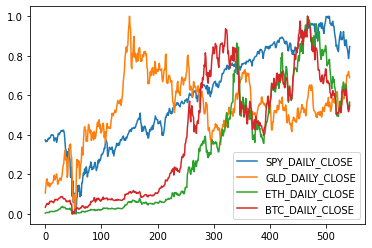

In [15]:
scaled_combined_frame.plot()

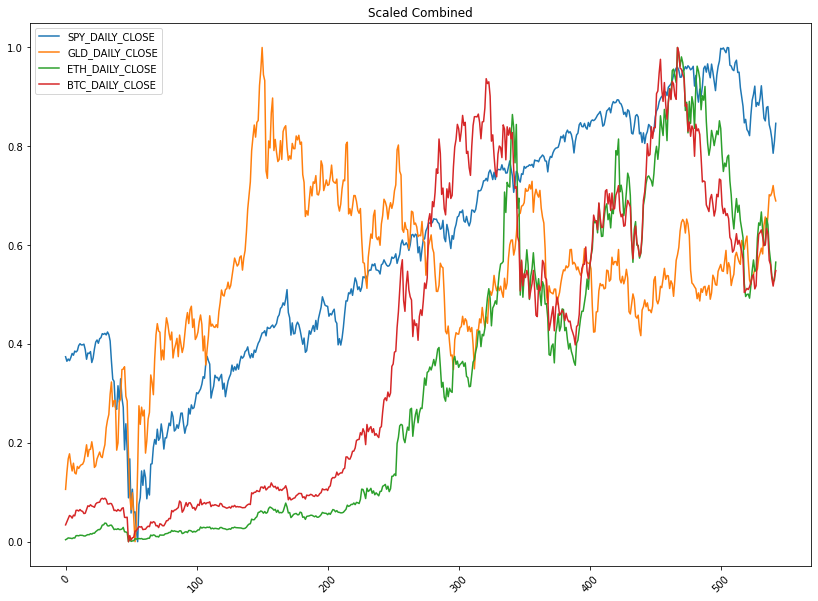

In [16]:
scaled_combined_frame.plot(figsize=(14, 10), title='Scaled Combined', rot=45);

In [17]:
#  Create the Features X and Target y Data
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)


In [18]:
# -----------------Starting spy_historical code here???? (cause function above is generic to all??? -JE)

In [19]:
spy_historical['Next Day Close'] = spy_historical.SPY_DAILY_CLOSE.shift(-1)

In [20]:
spy_historical = spy_historical.dropna()
spy_historical

SPY_DAILY_CLOSE  Next Day Close
2020-01-02       314.719116      312.336060
2020-01-03       312.336060      313.527618
2020-01-06       313.527618      312.646057
2020-01-07       312.646057      314.312286
2020-01-08       314.312286      316.443542
...                     ...             ...
2022-02-17       437.059998      434.230011
2022-02-18       434.230011      429.570007
2022-02-22       429.570007      421.950012
2022-02-23       421.950012      428.299988
2022-02-24       428.299988      437.750000

[542 rows x 2 columns]

In [21]:
# Define the window size
window_size = 50

# Set the index of the feature and target columns
feature_column = 0
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(spy_historical, window_size, feature_column, target_column)


# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[314.719116 312.33606  313.527618 312.646057 314.312286 316.443542
  315.532928 317.702972 317.218567 317.935486 320.58017  321.577972
  320.948242 320.98703  321.355194 318.497314 313.391968 316.676117
  316.41452  317.441406 311.677338 313.992615 318.77829  322.459595
  323.544556 321.82016  324.222687 324.784546 326.877045 326.52832
  327.051422 326.208588 327.768311 326.421753 323.06015  312.345734
  302.881042 301.766937 288.21405  287.003174 299.432251 290.858765
  303.084442 293.009369 288.165588 265.66153  279.408081 265.787384
  240.357605 260.904907]
 [312.33606  313.527618 312.646057 314.312286 316.443542 315.532928
  317.702972 317.218567 317.935486 320.58017  321.577972 320.948242
  320.98703  321.355194 318.497314 313.391968 316.676117 316.41452
  317.441406 311.677338 313.992615 318.77829  322.459595 323.544556
  321.82016  324.222687 324.784546 326.877045 326.52832  327.051422
  326.208588 327.768311 326.421753 323.06015  312.345734 302.881042
  301.76

In [22]:
window_size

50

In [23]:
# Split Data Between Training and Testing Sets
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [24]:
X

array([[314.719116, 312.33606 , 313.527618, ..., 265.787384, 240.357605,
        260.904907],
       [312.33606 , 313.527618, 312.646057, ..., 240.357605, 260.904907,
        232.355713],
       [313.527618, 312.646057, 314.312286, ..., 260.904907, 232.355713,
        244.901077],
       ...,
       [464.717346, 469.091949, 464.936584, ..., 446.600006, 437.059998,
        434.230011],
       [469.091949, 464.936584, 461.737793, ..., 437.059998, 434.230011,
        429.570007],
       [464.936584, 461.737793, 468.952454, ..., 434.230011, 429.570007,
        421.950012]])

In [25]:
# Scale Data with MinMaxScaler
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [26]:
#  Reshape Features Data for the LSTM Model
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.48568066]
  [0.47380562]
  [0.47974329]
  [0.47535037]
  [0.48365338]
  [0.49427367]
  [0.48973598]
  [0.50054955]
  [0.49813571]
  [0.50170819]
  [0.51488695]
  [0.51985911]
  [0.5167211 ]
  [0.51691438]
  [0.51874898]
  [0.50331588]
  [0.47793547]
  [0.49426209]
  [0.4929616 ]
  [0.49560287]
  [0.46549359]
  [0.47470638]
  [0.49819013]
  [0.51625464]
  [0.52157864]
  [0.51311687]
  [0.52490629]
  [0.52766339]
  [0.53793147]
  [0.53303299]
  [0.53169461]
  [0.52543953]
  [0.53237483]
  [0.52498377]
  [0.50312211]
  [0.4452546 ]
  [0.40093751]
  [0.39436357]
  [0.33112175]
  [0.32388014]
  [0.37886822]
  [0.33934179]
  [0.39570596]
  [0.34925674]
  [0.3269254 ]
  [0.2231747 ]
  [0.28655057]
  [0.22375492]
  [0.10651573]
  [0.19864345]]

 [[0.47380562]
  [0.47974329]
  [0.47535037]
  [0.48365338]
  [0.49427367]
  [0.48973598]
  [0.50054955]
  [0.49813571]
  [0.50170819]
  [0.51488695]
  [0.51985911]
  [0.5167211 ]
  [0.51691438]
  [0.51874898]
  [0.50450785]


In [27]:
# Build and Train the LSTM RNN
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [28]:
# Create the LSTM RNN Model Structure
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [29]:
#  Compile the LSTM RNN Model
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [30]:
# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 30)            3840      
                                                                 
 dropout (Dropout)           (None, 50, 30)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 30)            7320      
                                                                 
 dropout_1 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [31]:
#  Train the Model
# Train the model
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=90, verbose=1)

Epoch 1/100
4/4 [==============================] - 13s 181ms/step - loss: 0.3530
Epoch 2/100
4/4 [==============================] - 1s 147ms/step - loss: 0.1488
Epoch 3/100
4/4 [==============================] - 0s 118ms/step - loss: 0.0179
Epoch 4/100
4/4 [==============================] - 1s 131ms/step - loss: 0.0573
Epoch 5/100
4/4 [==============================] - 0s 118ms/step - loss: 0.0347
Epoch 6/100
4/4 [==============================] - 1s 185ms/step - loss: 0.0277
Epoch 7/100
4/4 [==============================] - 1s 165ms/step - loss: 0.0263
Epoch 8/100
4/4 [==============================] - 1s 131ms/step - loss: 0.0169
Epoch 9/100
4/4 [==============================] - 1s 139ms/step - loss: 0.0132
Epoch 10/100
4/4 [==============================] - 0s 124ms/step - loss: 0.0178
Epoch 11/100
4/4 [==============================] - 0s 119ms/step - loss: 0.0155
Epoch 12/100
4/4 [==============================] - 0s 117ms/step - loss: 0.0127
Epoch 13/100
4/4 [==================

In [32]:
# Model Performance
# Evaluate the model

model.evaluate(X_test, y_test, verbose=0)

0.002882341155782342

In [33]:
# Make Predictions
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [34]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [35]:
#  Plotting Predicted Vs. Real Prices
 # Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "SPY Actual": real_prices.ravel(),
    "SPY Predicted": predicted_prices.ravel()
}, index = spy_historical.index[-len(real_prices): ]) 

# Show the DataFrame's head
stocks.head()

SPY Actual  SPY Predicted
2021-07-27  435.897217     437.117126
2021-07-28  437.705048     437.484375
2021-07-29  435.579346     437.897827
2021-07-30  434.665497     438.357483
2021-08-02  438.201691     438.838379

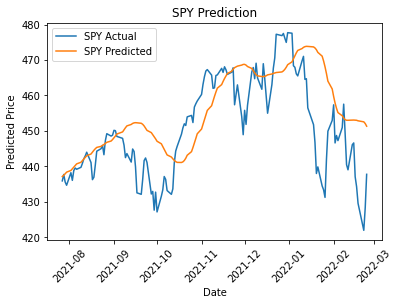

In [36]:
 # Plot the real vs predicted prices as a line chart
stocks.plot(title="SPY Prediction", xlabel="Date", ylabel="Predicted Price",rot=45);

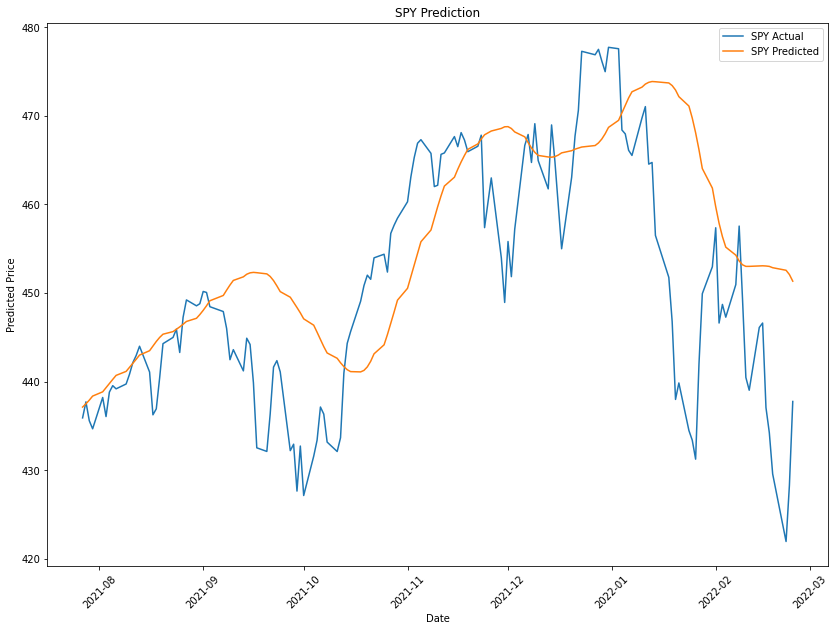

In [37]:
stocks.plot(figsize=(14, 10), title="SPY Prediction", xlabel="Date", ylabel="Predicted Price",rot=45);

In [38]:
combined_frame 

SPY_DAILY_CLOSE  GLD_DAILY_CLOSE  ETH_DAILY_CLOSE  BTC_DAILY_CLOSE
2020-01-02       314.719116       143.949997       127.158465      6963.684559
2020-01-03       312.336060       145.860001       134.364470      7345.355821
2020-01-06       313.527618       147.389999       144.157730      7759.080472
2020-01-07       312.646057       147.970001       142.877136      8149.535123
2020-01-08       314.312286       146.860001       140.734612      8053.347987
...                     ...              ...              ...              ...
2022-02-18       434.230011       177.119995      2779.744310     39981.937395
2022-02-22       429.570007       177.490005      2637.120761     38242.353621
2022-02-23       421.950012       178.289993      2580.276857     37259.471691
2022-02-24       428.299988       177.139999      2597.171785     38340.954437
2022-02-25       437.750000       176.550003      2767.637930     39226.973255

[543 rows x 4 columns]

In [39]:
 
# load dataset
dataset = combined_frame 
values = dataset.values


In [40]:
dataset

SPY_DAILY_CLOSE  GLD_DAILY_CLOSE  ETH_DAILY_CLOSE  BTC_DAILY_CLOSE
2020-01-02       314.719116       143.949997       127.158465      6963.684559
2020-01-03       312.336060       145.860001       134.364470      7345.355821
2020-01-06       313.527618       147.389999       144.157730      7759.080472
2020-01-07       312.646057       147.970001       142.877136      8149.535123
2020-01-08       314.312286       146.860001       140.734612      8053.347987
...                     ...              ...              ...              ...
2022-02-18       434.230011       177.119995      2779.744310     39981.937395
2022-02-22       429.570007       177.490005      2637.120761     38242.353621
2022-02-23       421.950012       178.289993      2580.276857     37259.471691
2022-02-24       428.299988       177.139999      2597.171785     38340.954437
2022-02-25       437.750000       176.550003      2767.637930     39226.973255

[543 rows x 4 columns]

In [41]:
# --------------------------------------------------------Starting Model for gld_historical here 


In [42]:
gld_historical

GLD_DAILY_CLOSE
2020-01-02       143.949997
2020-01-03       145.860001
2020-01-06       147.389999
2020-01-07       147.970001
2020-01-08       146.860001
...                     ...
2022-02-18       177.119995
2022-02-22       177.490005
2022-02-23       178.289993
2022-02-24       177.139999
2022-02-25       176.550003

[543 rows x 1 columns]

In [43]:
gld_historical['Next Day Close'] = gld_historical.GLD_DAILY_CLOSE.shift(-1)

In [44]:
gld_historical = gld_historical.dropna()
gld_historical

GLD_DAILY_CLOSE  Next Day Close
2020-01-02       143.949997      145.860001
2020-01-03       145.860001      147.389999
2020-01-06       147.389999      147.970001
2020-01-07       147.970001      146.860001
2020-01-08       146.860001      146.029999
...                     ...             ...
2022-02-17       177.250000      177.119995
2022-02-18       177.119995      177.490005
2022-02-22       177.490005      178.289993
2022-02-23       178.289993      177.139999
2022-02-24       177.139999      176.550003

[542 rows x 2 columns]

In [45]:
# Define the window size
window_size = 50

# Set the index of the feature and target columns
feature_column = 0
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(gld_historical, window_size, feature_column, target_column)


# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[143.949997 145.860001 147.389999 147.970001 146.860001 146.029999
  146.910004 145.820007 145.690002 146.539993 146.309998 146.580002
  146.740005 146.789993 147.119995 147.979996 148.990005 147.660004
  148.460007 148.470001 149.330002 148.360001 146.429993 146.610001
  147.399994 147.789993 148.169998 147.660004 147.539993 148.380005
  149.       150.910004 151.789993 152.410004 154.699997 156.089996
  153.300003 153.970001 154.       148.380005 149.199997 153.889999
  154.160004 157.490005 157.550003 157.809998 154.479996 153.929993
  147.789993 143.279999]
 [145.860001 147.389999 147.970001 146.860001 146.029999 146.910004
  145.820007 145.690002 146.539993 146.309998 146.580002 146.740005
  146.789993 147.119995 147.979996 148.990005 147.660004 148.460007
  148.470001 149.330002 148.360001 146.429993 146.610001 147.399994
  147.789993 148.169998 147.660004 147.539993 148.380005 149.
  150.910004 151.789993 152.410004 154.699997 156.089996 153.300003
  153.970001

In [46]:
# Split Data Between Training and Testing Sets
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [47]:
# Scale Data with MinMaxScaler
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [48]:
#  Reshape Features Data for the LSTM Model
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.10581922]
  [0.14001803]
  [0.1674128 ]
  [0.1777978 ]
  [0.15792313]
  [0.14306186]
  [0.15881844]
  [0.13930194]
  [0.13697418]
  [0.15219336]
  [0.14807528]
  [0.15290972]
  [0.15577459]
  [0.15666963]
  [0.16257835]
  [0.17797676]
  [0.19606107]
  [0.17224727]
  [0.1865714 ]
  [0.18675035]
  [0.20214875]
  [0.18478079]
  [0.1502238 ]
  [0.15344686]
  [0.16759176]
  [0.17457474]
  [0.18137876]
  [0.17224727]
  [0.17009846]
  [0.18513896]
  [0.19624003]
  [0.23043885]
  [0.24619514]
  [0.2572965 ]
  [0.29829905]
  [0.32318713]
  [0.27323202]
  [0.2852284 ]
  [0.28576554]
  [0.18513896]
  [0.199821  ]
  [0.28379596]
  [0.28863043]
  [0.34825443]
  [0.3493287 ]
  [0.35398394]
  [0.29435991]
  [0.28451206]
  [0.17457474]
  [0.09382284]]

 [[0.14001803]
  [0.1674128 ]
  [0.1777978 ]
  [0.15792313]
  [0.14306186]
  [0.15881844]
  [0.13930194]
  [0.13697418]
  [0.15219336]
  [0.14807528]
  [0.15290972]
  [0.15577459]
  [0.15666963]
  [0.16257835]
  [0.17797676]


In [49]:
# WE ALREADY DID THIS ABOVE ... JUST BEING CONSISTENT -JE
# Build and Train the LSTM RNN
# Importing required Keras modules
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

In [50]:
# Create the LSTM RNN Model Structure
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [51]:
#  Compile the LSTM RNN Model
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [52]:
# Show the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 30)            3840      
                                                                 
 dropout_3 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_4 (LSTM)               (None, 50, 30)            7320      
                                                                 
 dropout_4 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_5 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_5 (Dropout)         (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [53]:
#  Train the Model
# Train the model
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=90, verbose=1)

Epoch 1/100
4/4 [==============================] - 5s 72ms/step - loss: 0.3374
Epoch 2/100
4/4 [==============================] - 0s 70ms/step - loss: 0.1550
Epoch 3/100
4/4 [==============================] - 0s 76ms/step - loss: 0.0335
Epoch 4/100
4/4 [==============================] - 0s 77ms/step - loss: 0.0502
Epoch 5/100
4/4 [==============================] - 0s 72ms/step - loss: 0.0232
Epoch 6/100
4/4 [==============================] - 0s 74ms/step - loss: 0.0227
Epoch 7/100
4/4 [==============================] - 0s 75ms/step - loss: 0.0287
Epoch 8/100
4/4 [==============================] - 0s 74ms/step - loss: 0.0190
Epoch 9/100
4/4 [==============================] - 0s 74ms/step - loss: 0.0175
Epoch 10/100
4/4 [==============================] - 0s 75ms/step - loss: 0.0189
Epoch 11/100
4/4 [==============================] - 0s 74ms/step - loss: 0.0163
Epoch 12/100
4/4 [==============================] - 0s 76ms/step - loss: 0.0146
Epoch 13/100
4/4 [==============================]

In [54]:
# Model Performance
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.0031336566898971796

In [55]:
# Make Predictions
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [56]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [57]:
#  Plotting Predicted Vs. Real Prices
 # Create a DataFrame of Real and Predicted values

gold = pd.DataFrame({
    "Gold Actual": real_prices.ravel(),
    "Gold Predicted": predicted_prices.ravel()
}, index = gld_historical.index[-len(real_prices): ]) 

# Show the DataFrame's head
gold.head()

Gold Actual  Gold Predicted
2021-07-27   169.289993      169.870148
2021-07-28   171.169998      169.898148
2021-07-29   169.820007      169.884033
2021-07-30   169.610001      169.876251
2021-08-02   169.490005      169.877014

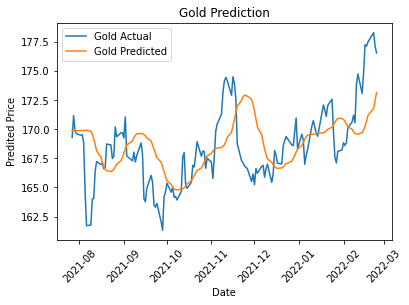

In [58]:
# Plot the real vs predicted prices as a line chart
# STILL THINKING IT SHOULD BE STOCKS2 OR SOMETHING SO IT DOESN'T OVERWRITE ABOVE FOR SPY?
gold.plot(title="Gold Prediction",xlabel="Date",ylabel="Predited Price", rot=45);

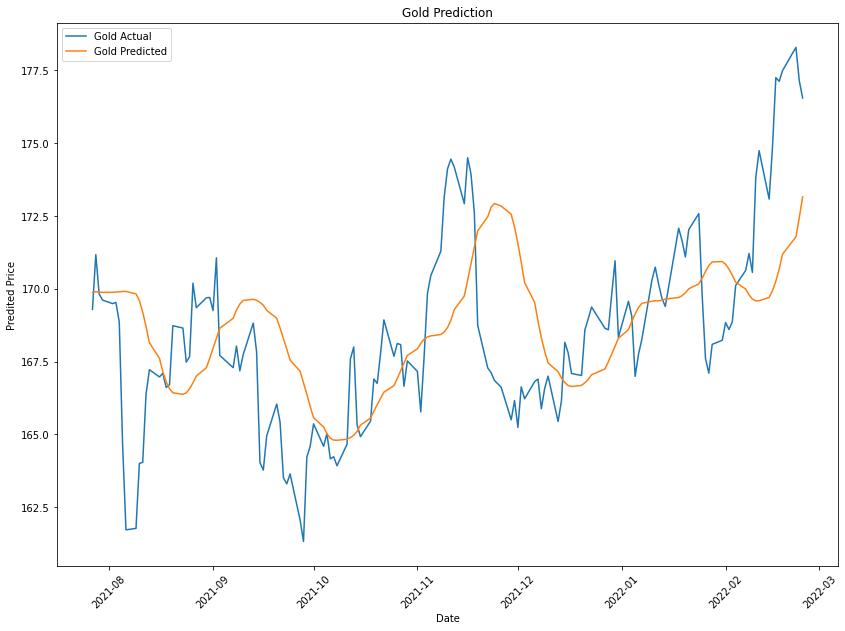

In [59]:
gold.plot(figsize=(14, 10), title="Gold Prediction",xlabel="Date",ylabel="Predited Price", rot=45);

In [60]:
# --------------------------------------------------------Starting Model for ETH_DAILY_CLOSE here (STILL NEEDS REVIEW ON ALL VARIABLES!!!!  but I think I got it???)

In [61]:
eth_historical

ETH_DAILY_CLOSE
2020-01-01       130.591979
2020-01-02       127.158465
2020-01-03       134.364470
2020-01-04       134.216472
2020-01-05       135.389122
...                     ...
2022-02-21      2568.779103
2022-02-22      2637.120761
2022-02-23      2580.276857
2022-02-24      2597.171785
2022-02-25      2767.637930

[787 rows x 1 columns]

In [62]:
eth_historical['Next Day Close'] = eth_historical.ETH_DAILY_CLOSE.shift(-1)

In [63]:
eth_historical = eth_historical.dropna()
eth_historical

ETH_DAILY_CLOSE  Next Day Close
2020-01-01       130.591979      127.158465
2020-01-02       127.158465      134.364470
2020-01-03       134.364470      134.216472
2020-01-04       134.216472      135.389122
2020-01-05       135.389122      144.157730
...                     ...             ...
2022-02-20      2622.361412     2568.779103
2022-02-21      2568.779103     2637.120761
2022-02-22      2637.120761     2580.276857
2022-02-23      2580.276857     2597.171785
2022-02-24      2597.171785     2767.637930

[786 rows x 2 columns]

In [64]:
# Define the window size
window_size = 50

# Set the index of the feature and target columns
feature_column = 0
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(eth_historical, window_size, feature_column, target_column)


# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[130.5919791  127.15846531 134.36447012 134.21647191 135.38912228
  144.15773029 142.8771358  140.7346123  137.7398682  144.83539979
  142.41693477 146.51060801 143.56147391 165.57809796 166.33775761
  164.14197536 169.79751327 174.0804766  166.86178806 166.83901123
  169.42940992 168.02633103 162.77430804 162.58644543 160.37608485
  167.83431384 170.07947236 175.73431339 174.3377627  184.66201008
  179.92622755 183.65144593 188.4719921  189.25886799 188.77630395
  203.82049288 213.07060622 223.27907582 223.06873345 228.52484341
  222.91407117 237.0071774  265.83279122 268.33688438 285.33103229
  264.89552937 258.94730437 265.96803488 282.70752949 259.7998157 ]
 [127.15846531 134.36447012 134.21647191 135.38912228 144.15773029
  142.8771358  140.7346123  137.7398682  144.83539979 142.41693477
  146.51060801 143.56147391 165.57809796 166.33775761 164.14197536
  169.79751327 174.0804766  166.86178806 166.83901123 169.42940992
  168.02633103 162.77430804 162.58644543 160

In [65]:
# Split Data Between Training and Testing Sets
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [66]:
# Scale Data with MinMaxScaler
# Importing the MinMaxScaler from sklearn
# from sklearn.preprocessing import MinMaxScaler  ------hashed out because it's already done above

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [67]:
#  Reshape Features Data for the LSTM Model
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.00543966]
  [0.00459467]
  [0.00636808]
  [0.00633166]
  [0.00662025]
  [0.00877822]
  [0.00846306]
  [0.00793578]
  [0.00719877]
  [0.00894499]
  [0.00834981]
  [0.00935727]
  [0.00863148]
  [0.01404981]
  [0.01423676]
  [0.01369637]
  [0.01508821]
  [0.01614226]
  [0.01436572]
  [0.01436012]
  [0.01499762]
  [0.01465232]
  [0.01335979]
  [0.01331356]
  [0.01276958]
  [0.01460507]
  [0.0151576 ]
  [0.01654927]
  [0.01620557]
  [0.01874639]
  [0.01758091]
  [0.01849769]
  [0.01968403]
  [0.01987768]
  [0.01975892]
  [0.02346132]
  [0.02573779]
  [0.02825011]
  [0.02819835]
  [0.02954111]
  [0.02816029]
  [0.03162862]
  [0.03872265]
  [0.03933891]
  [0.0435212 ]
  [0.03849199]
  [0.03702812]
  [0.03875594]
  [0.04287555]
  [0.03723793]]

 [[0.00459467]
  [0.00636808]
  [0.00633166]
  [0.00662025]
  [0.00877822]
  [0.00846306]
  [0.00793578]
  [0.00719877]
  [0.00894499]
  [0.00834981]
  [0.00935727]
  [0.00863148]
  [0.01404981]
  [0.01423676]
  [0.01369637]


In [68]:
# WE ALREADY DID THIS ABOVE ... JUST BEING CONSISTENT -JE
# Build and Train the LSTM RNN
# Importing required Keras modules
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

In [69]:
# Create the LSTM RNN Model Structure
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [70]:
#  Compile the LSTM RNN Model
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [71]:
# Show the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 30)            3840      
                                                                 
 dropout_6 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50, 30)            7320      
                                                                 
 dropout_7 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_8 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_8 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [72]:
#  Train the Model
# Train the model
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=90, verbose=1)

Epoch 1/100
6/6 [==============================] - 6s 75ms/step - loss: 0.0421
Epoch 2/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0150
Epoch 3/100
6/6 [==============================] - 0s 73ms/step - loss: 0.0196
Epoch 4/100
6/6 [==============================] - 0s 70ms/step - loss: 0.0149
Epoch 5/100
6/6 [==============================] - 0s 77ms/step - loss: 0.0095
Epoch 6/100
6/6 [==============================] - 0s 71ms/step - loss: 0.0097
Epoch 7/100
6/6 [==============================] - 0s 70ms/step - loss: 0.0075
Epoch 8/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0080
Epoch 9/100
6/6 [==============================] - 0s 75ms/step - loss: 0.0066
Epoch 10/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0071
Epoch 11/100
6/6 [==============================] - 0s 76ms/step - loss: 0.0065
Epoch 12/100
6/6 [==============================] - 0s 73ms/step - loss: 0.0067
Epoch 13/100
6/6 [==============================]

In [73]:
# Model Performance
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.04656616225838661

In [74]:
# Make Predictions
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [75]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [76]:
#  Plotting Predicted Vs. Real Prices
 # Create a DataFrame of Real and Predicted values
 
ethereum = pd.DataFrame({
    "ETH Actual": real_prices.ravel(),
    "ETH Predicted": predicted_prices.ravel()
}, index = eth_historical.index[-len(real_prices): ]) 

# Show the DataFrame's head
ethereum.head()

ETH Actual  ETH Predicted
2021-07-19  1786.324923    2098.076416
2021-07-20  1995.530504    2074.933838
2021-07-21  2024.617184    2051.457764
2021-07-22  2124.504550    2032.958252
2021-07-23  2185.130932    2021.472290

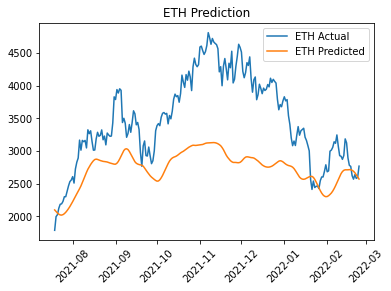

In [77]:
# Plot the real vs predicted prices as a line chart

ethereum.plot( title='ETH Prediction', rot=45);

In [78]:
#------------------------------------------------------------ NOW btc_historical time

In [79]:
btc_historical['Next Day Close'] = btc_historical.BTC_DAILY_CLOSE.shift(-1)

In [80]:
btc_historical = btc_historical.dropna()
btc_historical

BTC_DAILY_CLOSE  Next Day Close
2020-01-01      7196.776430     6963.684559
2020-01-02      6963.684559     7345.355821
2020-01-03      7345.355821     7354.871466
2020-01-04      7354.871466     7358.496281
2020-01-05      7358.496281     7759.080472
...                     ...             ...
2022-02-20     38391.565453    37017.579074
2022-02-21     37017.579074    38242.353621
2022-02-22     38242.353621    37259.471691
2022-02-23     37259.471691    38340.954437
2022-02-24     38340.954437    39226.973255

[786 rows x 2 columns]

In [81]:
# Define the window size
window_size = 50

# Set the index of the feature and target columns
feature_column = 0
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(btc_historical, window_size, feature_column, target_column)


# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[ 7196.77642953  6963.68455916  7345.355821    7354.87146609
   7358.49628102  7759.08047172  8149.53512287  8053.34798736
   7817.22126824  8195.80728733  8019.63523272  8183.75432766
   8108.36327929  8807.33433935  8818.48721104  8719.26225523
   8907.71967768  8910.84602677  8700.5933604   8640.13257848
   8733.24731624  8677.80543616  8400.57449636  8437.2725853
   8339.46752166  8611.8739477   8906.44135584  9380.02051517
   9298.86807256  9511.37860987  9350.8327699   9385.56221367
   9332.71865477  9291.65367068  9192.4269511   9612.31935025
   9767.80543275  9812.29222012  9894.98652011 10154.53120288
   9851.71976365 10234.71087324 10332.01140272 10228.9940531
  10347.63343262  9905.42654053  9926.28427871  9692.20976042
  10170.96637038  9625.82539415]
 [ 6963.68455916  7345.355821    7354.87146609  7358.49628102
   7759.08047172  8149.53512287  8053.34798736  7817.22126824
   8195.80728733  8019.63523272  8183.75432766  8108.36327929
   8807.33433935  8818

In [82]:
# Split Data Between Training and Testing Sets
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [83]:
# Scale Data with MinMaxScaler
# Importing the MinMaxScaler from sklearn
# from sklearn.preprocessing import MinMaxScaler  ------hashed out because it's already done above

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [84]:
#  Reshape Features Data for the LSTM Model
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.04027801]
  [0.03631012]
  [0.04280725]
  [0.04296923]
  [0.04303094]
  [0.04985003]
  [0.05649668]
  [0.0548593 ]
  [0.05083975]
  [0.05728436]
  [0.05428541]
  [0.05707919]
  [0.05579582]
  [0.0676943 ]
  [0.06788415]
  [0.06619506]
  [0.06940314]
  [0.06945636]
  [0.06587726]
  [0.06484805]
  [0.06643313]
  [0.06548935]
  [0.06077008]
  [0.06139479]
  [0.05972987]
  [0.064367  ]
  [0.06938138]
  [0.07744305]
  [0.0760616 ]
  [0.07967914]
  [0.07694619]
  [0.07753739]
  [0.07663784]
  [0.0759388 ]
  [0.07424967]
  [0.08139744]
  [0.08404426]
  [0.08480155]
  [0.08620924]
  [0.09062743]
  [0.08547272]
  [0.09199232]
  [0.09364865]
  [0.091895  ]
  [0.09391458]
  [0.08638696]
  [0.08674202]
  [0.0827574 ]
  [0.09090721]
  [0.08162735]]

 [[0.03631012]
  [0.04280725]
  [0.04296923]
  [0.04303094]
  [0.04985003]
  [0.05649668]
  [0.0548593 ]
  [0.05083975]
  [0.05728436]
  [0.05428541]
  [0.05707919]
  [0.05579582]
  [0.0676943 ]
  [0.06788415]
  [0.06619506]


In [85]:
# WE ALREADY DID THIS ABOVE ... JUST BEING CONSISTENT -JE
# Build and Train the LSTM RNN
# Importing required Keras modules
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

In [86]:
# Create the LSTM RNN Model Structure
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [87]:
#  Compile the LSTM RNN Model
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [88]:
# Show the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50, 30)            3840      
                                                                 
 dropout_9 (Dropout)         (None, 50, 30)            0         
                                                                 
 lstm_10 (LSTM)              (None, 50, 30)            7320      
                                                                 
 dropout_10 (Dropout)        (None, 50, 30)            0         
                                                                 
 lstm_11 (LSTM)              (None, 30)                7320      
                                                                 
 dropout_11 (Dropout)        (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [89]:
#  Train the Model
# Train the model
model.fit(X_train, y_train, epochs=100, shuffle=False, batch_size=90, verbose=1)

Epoch 1/100
6/6 [==============================] - 6s 72ms/step - loss: 0.0822
Epoch 2/100
6/6 [==============================] - 0s 73ms/step - loss: 0.0183
Epoch 3/100
6/6 [==============================] - 0s 73ms/step - loss: 0.0277
Epoch 4/100
6/6 [==============================] - 0s 76ms/step - loss: 0.0200
Epoch 5/100
6/6 [==============================] - 0s 75ms/step - loss: 0.0151
Epoch 6/100
6/6 [==============================] - 0s 78ms/step - loss: 0.0103
Epoch 7/100
6/6 [==============================] - 0s 76ms/step - loss: 0.0099
Epoch 8/100
6/6 [==============================] - 0s 75ms/step - loss: 0.0086
Epoch 9/100
6/6 [==============================] - 0s 70ms/step - loss: 0.0100
Epoch 10/100
6/6 [==============================] - 0s 72ms/step - loss: 0.0095
Epoch 11/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0101
Epoch 12/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0106
Epoch 13/100
6/6 [==============================]

In [90]:
# Model Performance
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.004311909433454275

In [91]:
# Make Predictions
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [92]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [93]:
#  Plotting Predicted Vs. Real Prices
 # Create a DataFrame of Real and Predicted values

bitcoin = pd.DataFrame({
    "BTC Actual": real_prices.ravel(),
    "BTC Predicted": predicted_prices.ravel()
}, index = btc_historical.index[-len(real_prices): ]) 

# Show the DataFrame's head
bitcoin.head()

BTC Actual  BTC Predicted
2021-07-19  29793.295421   33687.265625
2021-07-20  32143.155562   33428.011719
2021-07-21  32290.634066   33131.414062
2021-07-22  33637.130024   32872.417969
2021-07-23  34263.721592   32682.435547

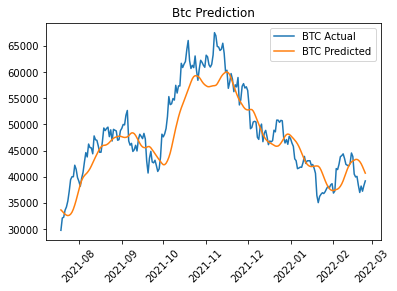

In [94]:
# Plot the real vs predicted prices as a line chart

bitcoin.plot(title="Btc Prediction", rot=45);

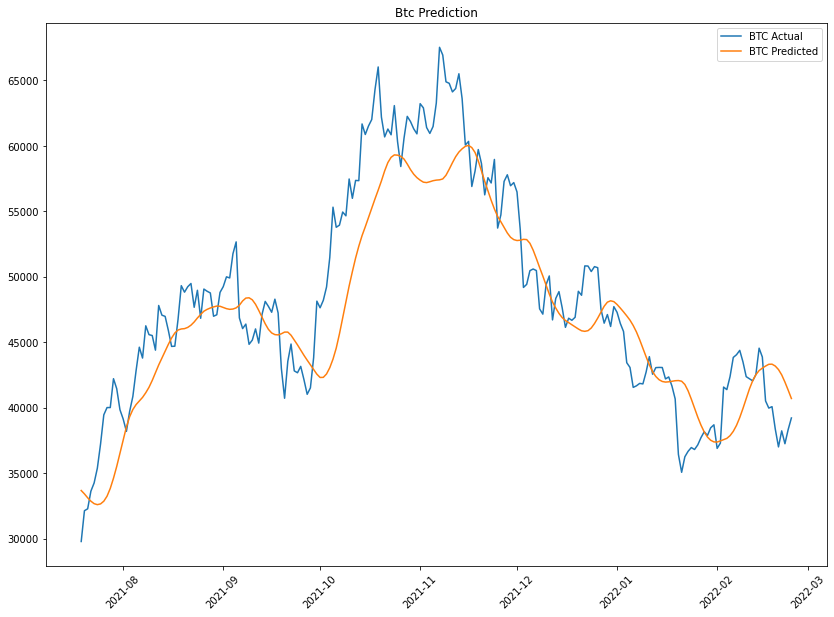

In [95]:
bitcoin.plot(figsize=(14, 10), title='Btc Prediction', rot=45);

In [96]:
#------------------------------------------------------NOW WHAT?????????????????????

In [97]:
# our prediction variables

In [98]:
bitcoin 

BTC Actual  BTC Predicted
2021-07-19  29793.295421   33687.265625
2021-07-20  32143.155562   33428.011719
2021-07-21  32290.634066   33131.414062
2021-07-22  33637.130024   32872.417969
2021-07-23  34263.721592   32682.435547
...                  ...            ...
2022-02-20  37017.579074   42924.679688
2022-02-21  38242.353621   42517.609375
2022-02-22  37259.471691   41966.460938
2022-02-23  38340.954437   41355.484375
2022-02-24  39226.973255   40712.968750

[221 rows x 2 columns]

In [99]:
ethereum

ETH Actual  ETH Predicted
2021-07-19  1786.324923    2098.076416
2021-07-20  1995.530504    2074.933838
2021-07-21  2024.617184    2051.457764
2021-07-22  2124.504550    2032.958252
2021-07-23  2185.130932    2021.472290
...                 ...            ...
2022-02-20  2568.779103    2689.513672
2022-02-21  2637.120761    2666.369873
2022-02-22  2580.276857    2636.261475
2022-02-23  2597.171785    2603.716553
2022-02-24  2767.637930    2570.563477

[221 rows x 2 columns]

In [100]:
gold

Gold Actual  Gold Predicted
2021-07-27   169.289993      169.870148
2021-07-28   171.169998      169.898148
2021-07-29   169.820007      169.884033
2021-07-30   169.610001      169.876251
2021-08-02   169.490005      169.877014
...                 ...             ...
2022-02-17   177.119995      170.671661
2022-02-18   177.490005      171.183792
2022-02-22   178.289993      171.782333
2022-02-23   177.139999      172.445129
2022-02-24   176.550003      173.154053

[148 rows x 2 columns]

In [101]:
stocks

SPY Actual  SPY Predicted
2021-07-27  435.897217     437.117126
2021-07-28  437.705048     437.484375
2021-07-29  435.579346     437.897827
2021-07-30  434.665497     438.357483
2021-08-02  438.201691     438.838379
...                ...            ...
2022-02-17  434.230011     452.990356
2022-02-18  429.570007     452.843262
2022-02-22  421.950012     452.552582
2022-02-23  428.299988     452.071350
2022-02-24  437.750000     451.321869

[148 rows x 2 columns]

In [102]:
combined_predictions = pd.concat([bitcoin, ethereum, gold, stocks], axis=1, join="inner")

In [103]:
combined_predictions

BTC Actual  BTC Predicted  ...  SPY Actual  SPY Predicted
2021-07-27  40022.237595   33252.761719  ...  435.897217     437.117126
2021-07-28  40021.289821   33846.382812  ...  437.705048     437.484375
2021-07-29  42225.297589   34626.062500  ...  435.579346     437.897827
2021-07-30  41463.223946   35525.941406  ...  434.665497     438.357483
2021-08-02  38203.429355   38537.968750  ...  438.201691     438.838379
...                  ...            ...  ...         ...            ...
2022-02-17  39981.937395   43326.242188  ...  434.230011     452.990356
2022-02-18  40089.154019   43335.203125  ...  429.570007     452.843262
2022-02-22  37259.471691   41966.460938  ...  421.950012     452.552582
2022-02-23  38340.954437   41355.484375  ...  428.299988     452.071350
2022-02-24  39226.973255   40712.968750  ...  437.750000     451.321869

[148 rows x 8 columns]

In [104]:
# shift the predicted column
stocks['SPY Compare Prediction'] = stocks['SPY Predicted'].shift(1)
stocks.dropna(inplace=True)
stocks



SPY Actual  SPY Predicted  SPY Compare Prediction
2021-07-28  437.705048     437.484375              437.117126
2021-07-29  435.579346     437.897827              437.484375
2021-07-30  434.665497     438.357483              437.897827
2021-08-02  438.201691     438.838379              438.357483
2021-08-03  436.046234     439.309601              438.838379
...                ...            ...                     ...
2022-02-17  434.230011     452.990356              453.036316
2022-02-18  429.570007     452.843262              452.990356
2022-02-22  421.950012     452.552582              452.843262
2022-02-23  428.299988     452.071350              452.552582
2022-02-24  437.750000     451.321869              452.071350

[147 rows x 3 columns]

In [105]:
SPY_actual_vs_compared = stocks['SPY Actual'] - stocks['SPY Compare Prediction']
SPY_actual_vs_compared

2021-07-28     0.587922
2021-07-29    -1.905029
2021-07-30    -3.232330
2021-08-02    -0.155792
2021-08-03    -2.792145
                ...    
2022-02-17   -18.806305
2022-02-18   -23.420349
2022-02-22   -30.893250
2022-02-23   -24.252594
2022-02-24   -14.321350
Length: 147, dtype: float64

In [106]:
SPY_actual_vs_compared.sum()

-698.2977952402341

In [107]:
#------BTC

In [108]:
bitcoin['BTC Compare Prediction'] = bitcoin['BTC Predicted'].shift(1)
bitcoin.dropna(inplace=True)
bitcoin

BTC Actual  BTC Predicted  BTC Compare Prediction
2021-07-20  32143.155562   33428.011719            33687.265625
2021-07-21  32290.634066   33131.414062            33428.011719
2021-07-22  33637.130024   32872.417969            33131.414062
2021-07-23  34263.721592   32682.435547            32872.417969
2021-07-24  35391.816933   32607.423828            32682.435547
...                  ...            ...                     ...
2022-02-20  37017.579074   42924.679688            43192.691406
2022-02-21  38242.353621   42517.609375            42924.679688
2022-02-22  37259.471691   41966.460938            42517.609375
2022-02-23  38340.954437   41355.484375            41966.460938
2022-02-24  39226.973255   40712.968750            41355.484375

[220 rows x 3 columns]

In [109]:
BTC_actual_vs_compared = bitcoin['BTC Actual'] - bitcoin['BTC Compare Prediction']
BTC_actual_vs_compared

2021-07-20   -1544.110063
2021-07-21   -1137.377653
2021-07-22     505.715962
2021-07-23    1391.303623
2021-07-24    2709.381386
                 ...     
2022-02-20   -6175.112332
2022-02-21   -4682.326066
2022-02-22   -5258.137684
2022-02-23   -3625.506501
2022-02-24   -2128.511120
Length: 220, dtype: float64

In [110]:
BTC_actual_vs_compared.sum()

338274.6856050415

In [111]:
#-------Gold

In [112]:
gold['Gold Compare Prediction'] = gold['Gold Predicted'].shift(1)
gold.dropna(inplace=True)
gold

Gold Actual  Gold Predicted  Gold Compare Prediction
2021-07-28   171.169998      169.898148               169.870148
2021-07-29   169.820007      169.884033               169.898148
2021-07-30   169.610001      169.876251               169.884033
2021-08-02   169.490005      169.877014               169.876251
2021-08-03   169.529999      169.884628               169.877014
...                 ...             ...                      ...
2022-02-17   177.119995      170.671661               170.261597
2022-02-18   177.490005      171.183792               170.671661
2022-02-22   178.289993      171.782333               171.183792
2022-02-23   177.139999      172.445129               171.782333
2022-02-24   176.550003      173.154053               172.445129

[147 rows x 3 columns]

In [113]:
Gold_actual_vs_compared = gold['Gold Actual'] - gold['Gold Compare Prediction']
Gold_actual_vs_compared

2021-07-28    1.299850
2021-07-29   -0.078141
2021-07-30   -0.274032
2021-08-02   -0.386246
2021-08-03   -0.347015
                ...   
2022-02-17    6.858398
2022-02-18    6.818344
2022-02-22    7.106201
2022-02-23    5.357666
2022-02-24    4.104874
Length: 147, dtype: float64

In [114]:
Gold_actual_vs_compared.sum()

-30.900121163085885

In [115]:
#---------------------eth

In [116]:
ethereum['ETH Compare Prediction'] = ethereum['ETH Predicted'].shift(1)
ethereum.dropna(inplace=True)
ethereum

ETH Actual  ETH Predicted  ETH Compare Prediction
2021-07-20  1995.530504    2074.933838             2098.076416
2021-07-21  2024.617184    2051.457764             2074.933838
2021-07-22  2124.504550    2032.958252             2051.457764
2021-07-23  2185.130932    2021.472290             2032.958252
2021-07-24  2190.786627    2019.080322             2021.472290
...                 ...            ...                     ...
2022-02-20  2568.779103    2689.513672             2704.623535
2022-02-21  2637.120761    2666.369873             2689.513672
2022-02-22  2580.276857    2636.261475             2666.369873
2022-02-23  2597.171785    2603.716553             2636.261475
2022-02-24  2767.637930    2570.563477             2603.716553

[220 rows x 3 columns]

In [117]:
ETH_actual_vs_compared = ethereum['ETH Actual'] - ethereum['ETH Compare Prediction']
ETH_actual_vs_compared

2021-07-20   -102.545912
2021-07-21    -50.316654
2021-07-22     73.046787
2021-07-23    152.172680
2021-07-24    169.314337
                 ...    
2022-02-20   -135.844432
2022-02-21    -52.392911
2022-02-22    -86.093016
2022-02-23    -39.089690
2022-02-24    163.921378
Length: 220, dtype: float64

In [118]:
ETH_actual_vs_compared.sum()

162671.12852155685

In [119]:
#---------------------------

In [120]:
scaler = preprocessing.MinMaxScaler()
names = combined_predictions.columns
d = scaler.fit_transform(combined_predictions)
scaled_combined_predictions = pd.DataFrame(d, columns=names)
scaled_combined_predictions.head()

BTC Actual  BTC Predicted  ...  SPY Actual  SPY Predicted
0    0.155185       0.000000  ...    0.250129       0.000000
1    0.155155       0.022157  ...    0.282551       0.009998
2    0.224322       0.051258  ...    0.244429       0.021253
3    0.200406       0.084846  ...    0.228040       0.033767
4    0.098107       0.197270  ...    0.291458       0.046858

[5 rows x 8 columns]

In [121]:
correlation = scaled_combined_predictions.corr()
correlation


BTC Actual  BTC Predicted  ...  SPY Actual  SPY Predicted
BTC Actual        1.000000       0.895488  ...    0.387439      -0.124633
BTC Predicted     0.895488       1.000000  ...    0.500656       0.098974
ETH Actual        0.882120       0.875072  ...    0.652716       0.224144
ETH Predicted     0.766897       0.910681  ...    0.449749       0.096968
Gold Actual      -0.125830      -0.025449  ...    0.118602       0.233161
Gold Predicted   -0.327016      -0.177607  ...    0.067782       0.416168
SPY Actual        0.387439       0.500656  ...    1.000000       0.623389
SPY Predicted    -0.124633       0.098974  ...    0.623389       1.000000

[8 rows x 8 columns]

In [122]:

scaled_needed_predictions = scaled_combined_predictions[['BTC Predicted', 'Gold Predicted', 'SPY Predicted']].copy()
scaled_needed_predictions


BTC Predicted  Gold Predicted  SPY Predicted
0         0.000000        0.607075       0.000000
1         0.022157        0.610425       0.009998
2         0.051258        0.608737       0.021253
3         0.084846        0.607805       0.033767
4         0.197270        0.607897       0.046858
..             ...             ...            ...
143       0.375993        0.702978       0.432123
144       0.376327        0.764255       0.428119
145       0.325239        0.835871       0.420206
146       0.302434        0.915176       0.407105
147       0.278452        1.000000       0.386702

[148 rows x 3 columns]

In [123]:
correlation_needed = scaled_needed_predictions.corr()
correlation_needed

BTC Predicted  Gold Predicted  SPY Predicted
BTC Predicted        1.000000       -0.177607       0.098974
Gold Predicted      -0.177607        1.000000       0.416168
SPY Predicted        0.098974        0.416168       1.000000

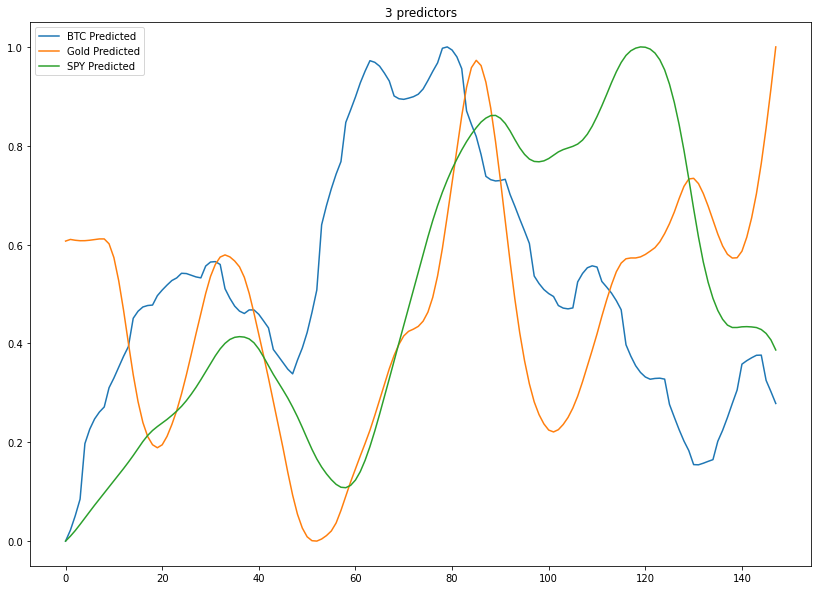

In [124]:
scaled_needed_predictions.plot(figsize=(14, 10), title='3 predictors')

In [125]:
scaled_needed_predictions_plus_ETH = scaled_combined_predictions[['BTC Predicted', 'Gold Predicted', 'SPY Predicted', 'ETH Predicted']].copy()
scaled_needed_predictions_plus_ETH

BTC Predicted  Gold Predicted  SPY Predicted  ETH Predicted
0         0.000000        0.607075       0.000000       0.000000
1         0.022157        0.610425       0.009998       0.024700
2         0.051258        0.608737       0.021253       0.052410
3         0.084846        0.607805       0.033767       0.082882
4         0.197270        0.607897       0.046858       0.190510
..             ...             ...            ...            ...
143       0.375993        0.702978       0.432123       0.611559
144       0.376327        0.764255       0.428119       0.610358
145       0.325239        0.835871       0.420206       0.538433
146       0.302434        0.915176       0.407105       0.507917
147       0.278452        1.000000       0.386702       0.476831

[148 rows x 4 columns]

In [126]:
four_corr = scaled_needed_predictions_plus_ETH.corr()

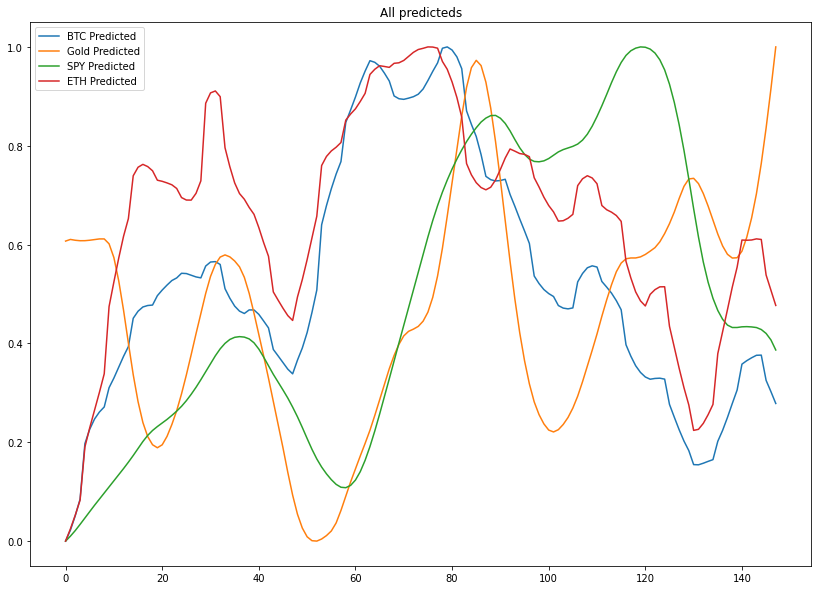

In [127]:
scaled_needed_predictions_plus_ETH.plot(figsize=(14, 10), title='All predicteds')

In [128]:
stocks.head()

SPY Actual  SPY Predicted  SPY Compare Prediction
2021-07-28  437.705048     437.484375              437.117126
2021-07-29  435.579346     437.897827              437.484375
2021-07-30  434.665497     438.357483              437.897827
2021-08-02  438.201691     438.838379              438.357483
2021-08-03  436.046234     439.309601              438.838379

In [129]:
gold.head()

Gold Actual  Gold Predicted  Gold Compare Prediction
2021-07-28   171.169998      169.898148               169.870148
2021-07-29   169.820007      169.884033               169.898148
2021-07-30   169.610001      169.876251               169.884033
2021-08-02   169.490005      169.877014               169.876251
2021-08-03   169.529999      169.884628               169.877014

In [130]:
bitcoin.head()

BTC Actual  BTC Predicted  BTC Compare Prediction
2021-07-20  32143.155562   33428.011719            33687.265625
2021-07-21  32290.634066   33131.414062            33428.011719
2021-07-22  33637.130024   32872.417969            33131.414062
2021-07-23  34263.721592   32682.435547            32872.417969
2021-07-24  35391.816933   32607.423828            32682.435547

In [131]:
ethereum.head()

ETH Actual  ETH Predicted  ETH Compare Prediction
2021-07-20  1995.530504    2074.933838             2098.076416
2021-07-21  2024.617184    2051.457764             2074.933838
2021-07-22  2124.504550    2032.958252             2051.457764
2021-07-23  2185.130932    2021.472290             2032.958252
2021-07-24  2190.786627    2019.080322             2021.472290

In [132]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = stocks["SPY Actual"]
y_pred = stocks["SPY Predicted"]
mean_absolute_percentage_error(y_true, y_pred)

0.01968394793233754

In [133]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = gold["Gold Actual"]
y_pred = gold["Gold Predicted"]
mean_absolute_percentage_error(y_true, y_pred)

0.014423954553976763

In [134]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = bitcoin["BTC Actual"]
y_pred = bitcoin["BTC Predicted"]
mean_absolute_percentage_error(y_true, y_pred)

0.06253102311719648

In [135]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = ethereum["ETH Actual"]
y_pred = ethereum["ETH Predicted"]
mean_absolute_percentage_error(y_true, y_pred)

0.19777608182732412

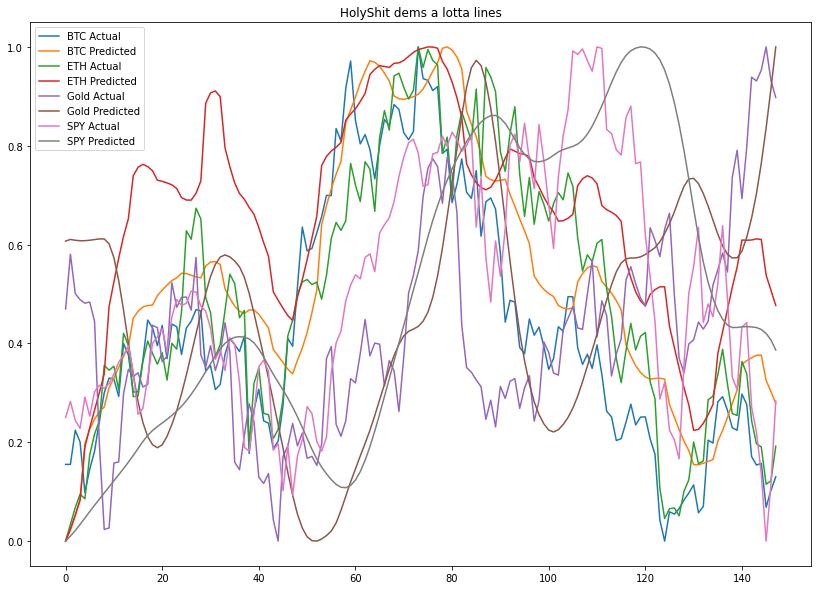

In [136]:
scaled_combined_predictions.plot(figsize=(14, 10), title='HolyShit dems a lotta lines')

In [137]:
scaled_combined_predictions

BTC Actual  BTC Predicted  ...  SPY Actual  SPY Predicted
0      0.155185       0.000000  ...    0.250129       0.000000
1      0.155155       0.022157  ...    0.282551       0.009998
2      0.224322       0.051258  ...    0.244429       0.021253
3      0.200406       0.084846  ...    0.228040       0.033767
4      0.098107       0.197270  ...    0.291458       0.046858
..          ...            ...  ...         ...            ...
143    0.153920       0.375993  ...    0.220230       0.432123
144    0.157285       0.376327  ...    0.136657       0.428119
145    0.068483       0.325239  ...    0.000000       0.420206
146    0.102422       0.302434  ...    0.113881       0.407105
147    0.130228       0.278452  ...    0.283357       0.386702

[148 rows x 8 columns]

In [138]:
andrei_spygld_btc_pred = scaled_combined_predictions[['BTC Actual', 'Gold Predicted', 'SPY Predicted']].copy()
andrei_spygld_btc_pred

BTC Actual  Gold Predicted  SPY Predicted
0      0.155185        0.607075       0.000000
1      0.155155        0.610425       0.009998
2      0.224322        0.608737       0.021253
3      0.200406        0.607805       0.033767
4      0.098107        0.607897       0.046858
..          ...             ...            ...
143    0.153920        0.702978       0.432123
144    0.157285        0.764255       0.428119
145    0.068483        0.835871       0.420206
146    0.102422        0.915176       0.407105
147    0.130228        1.000000       0.386702

[148 rows x 3 columns]

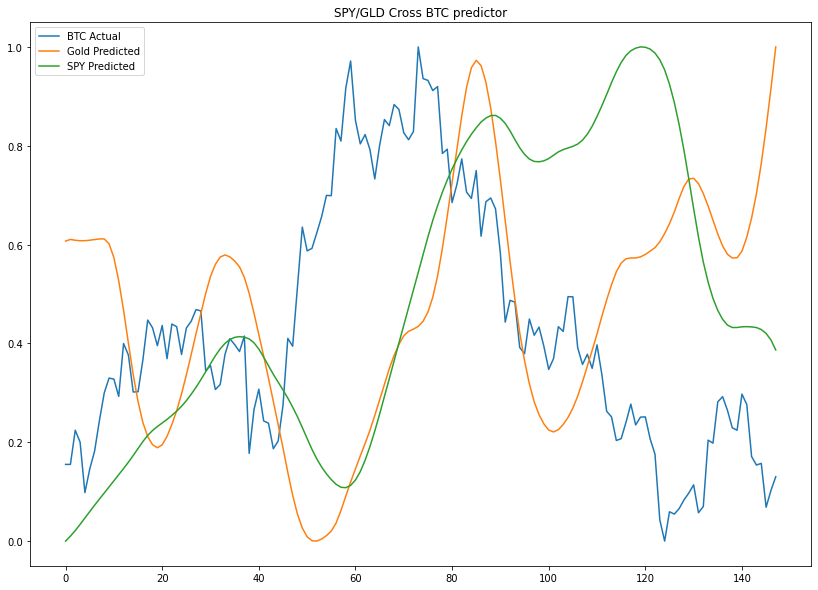

In [139]:
andrei_spygld_btc_pred.plot(figsize=(14, 10), title='SPY/GLD Cross BTC predictor')